<a href="https://colab.research.google.com/github/MHusni1604/KKN-Periode-2/blob/main/training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# ===📦 Paket bawaan===
import os
import random
import shutil

# ===📊 Data dan visualisasi===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===🖼️ Pemrosesan gambar===
from PIL import Image
import cv2

# ===🤖 TensorFlow & Keras===
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D,
    Dense, Flatten, Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
)
from tensorflow.keras import Input
from keras.layers import TFSMLayer

# ===🧪 Utilities===
from sklearn.model_selection import train_test_split

# ===🌐 Kaggle Hub===
import kagglehub

In [19]:
path = kagglehub.dataset_download("huberthamelin/garbage-classification-labels-corrections")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/garbage-classification-labels-corrections


In [20]:
os.listdir(path)

['garbage_classification_enhanced',
 'labels_corrections.csv',
 'garbage_classification_corrected']

In [21]:
os.listdir(os.path.join(path, 'garbage_classification_enhanced'))

['metal',
 'white-glass',
 'biological',
 'paper',
 'brown-glass',
 'battery',
 'trash',
 'cardboard',
 'shoes',
 'clothes',
 'plastic',
 'green-glass']

In [22]:
folder = os.path.join(path, 'garbage_classification_enhanced')

class_names = os.listdir(folder)
print(class_names)

['metal', 'white-glass', 'biological', 'paper', 'brown-glass', 'battery', 'trash', 'cardboard', 'shoes', 'clothes', 'plastic', 'green-glass']


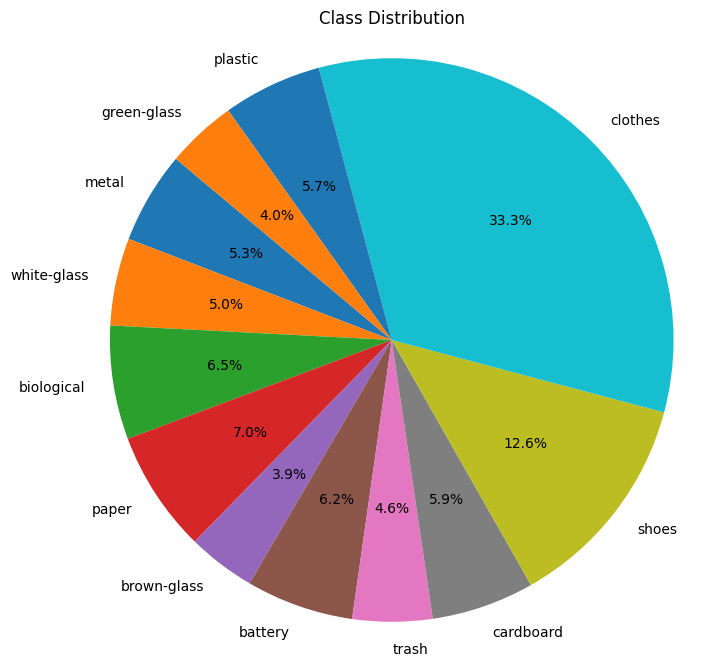

In [23]:
class_counts = []
for class_name in class_names:
    class_counts.append(len(os.listdir(os.path.join(folder, class_name))))

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

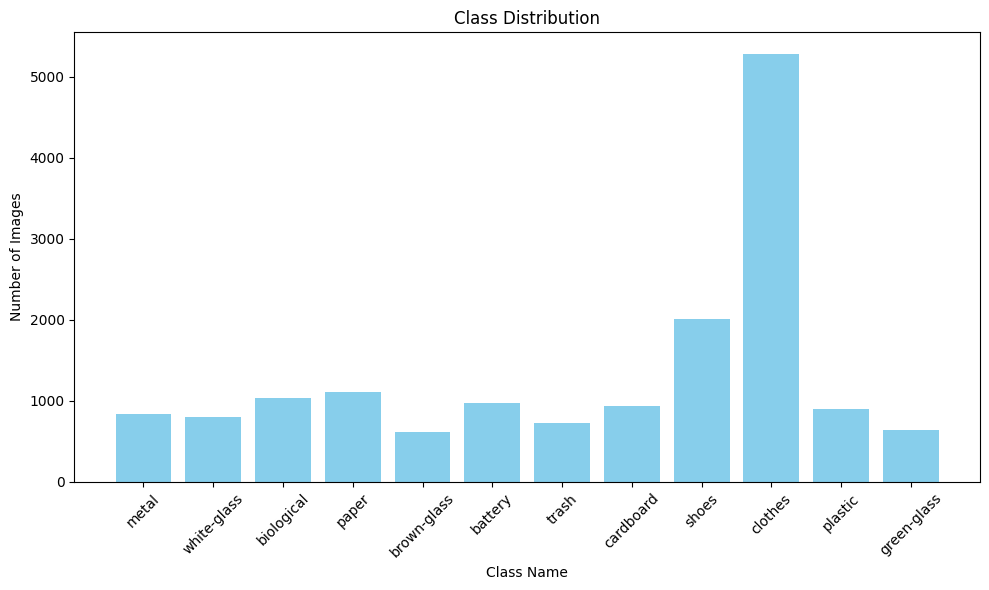

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

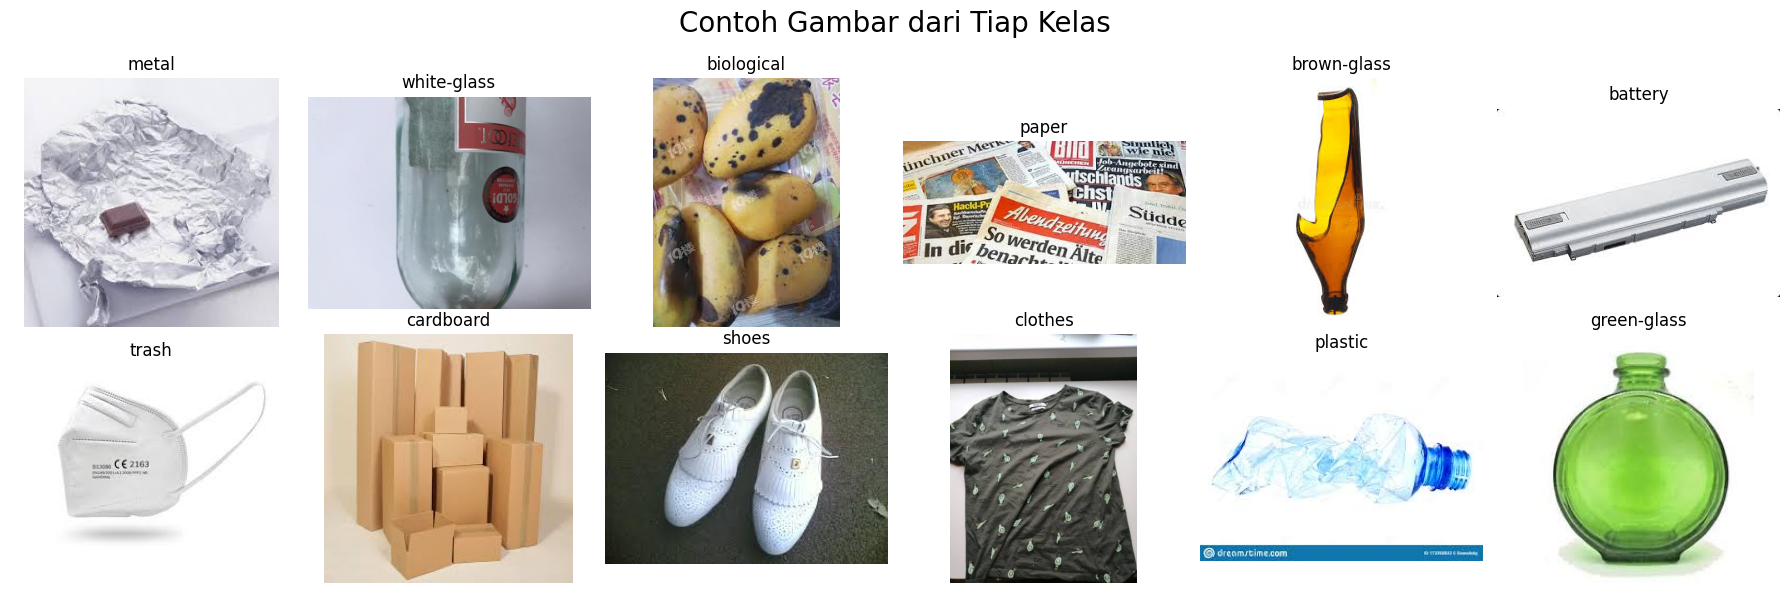

In [25]:
n_classes = len(class_names)
n_rows = 2
n_cols = int(np.ceil(n_classes / n_rows))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows))
axs = axs.flatten()  # ubah ke 1D array supaya mudah di-loop

for ax, class_name in zip(axs, class_names):
    image_paths = []
    for folder in [folder]:
        path = os.path.join(folder, class_name)
        if os.path.exists(path):
            image_paths += [os.path.join(path, img) for img in os.listdir(path)]

    if image_paths:
        img = cv2.cvtColor(cv2.imread(random.choice(image_paths)), cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.set_title(class_name)
    ax.axis('off')

plt.suptitle("Contoh Gambar dari Tiap Kelas", fontsize=20)
plt.tight_layout()
plt.show()

In [26]:
category_map = {
    'battery': 'b3',
    'biological': 'organik',
    'paper': 'daur_ulang',
    'cardboard': 'daur_ulang',
    'plastic': 'daur_ulang',
    'metal': 'daur_ulang',
    'white-glass': 'daur_ulang',
    'brown-glass': 'daur_ulang',
    'green-glass': 'daur_ulang',
    'clothes': 'residu',
    'shoes': 'residu',
    'trash': 'residu'
}

In [28]:
import os
import shutil

source_root = folder  # folder awal
target_root = 'dataset_kategori'  # folder baru setelah digabungkan

os.makedirs(target_root, exist_ok=True)

for old_class, new_class in category_map.items():
    old_path = os.path.join(source_root, old_class)
    new_path = os.path.join(target_root, new_class)
    os.makedirs(new_path, exist_ok=True)

    for file in os.listdir(old_path):
        src = os.path.join(old_path, file)
        dst = os.path.join(new_path, f"{old_class}_{file}")  # prefix agar tahu asalnya
        shutil.copy(src, dst)

In [31]:
new_class = os.listdir(os.path.join('dataset_kategori'))
print(new_class)

['b3', 'residu', 'daur_ulang', 'organik']


In [34]:
import os
import shutil
import random

# Konfigurasi
source_dir = 'dataset_kategori'
target_dir = 'dataset_split'
split_ratio = {'train': 0.7, 'val': 0.15, 'test': 0.15}

# Buat folder tujuan
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(source_dir):
        os.makedirs(os.path.join(target_dir, split, class_name), exist_ok=True)

# Bagi gambar
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)

    n = len(images)
    n_train = int(n * split_ratio['train'])
    n_val = int(n * split_ratio['val'])

    train_files = images[:n_train]
    val_files = images[n_train:n_train + n_val]
    test_files = images[n_train + n_val:]

    for split, files in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
        for file in files:
            src = os.path.join(class_path, file)
            dst = os.path.join(target_dir, split, class_name, file)
            shutil.copy(src, dst)

print("✅ Dataset berhasil dibagi menjadi train, val, dan test.")

✅ Dataset berhasil dibagi menjadi train, val, dan test.


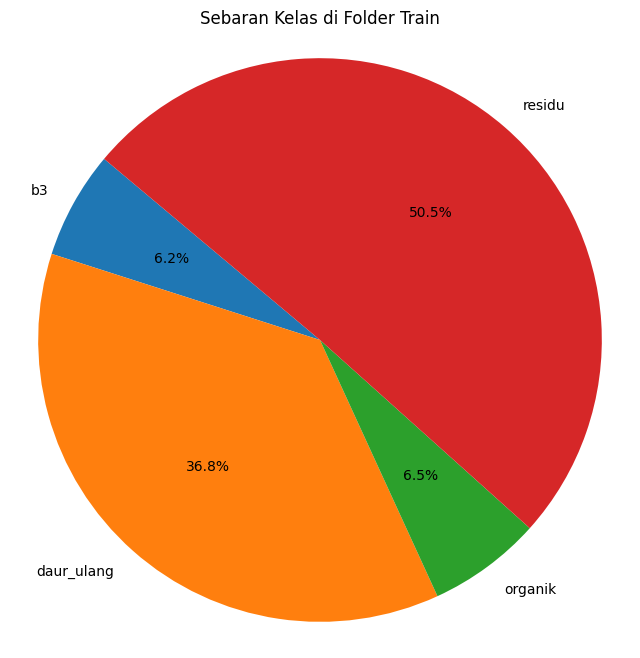

In [43]:
import os
import matplotlib.pyplot as plt

train_dir = 'dataset_split/train'

class_names = sorted(os.listdir(train_dir))  # nama folder kelas
class_counts = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    class_counts.append(count)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Sebaran Kelas di Folder Train')
plt.axis('equal')
plt.show()

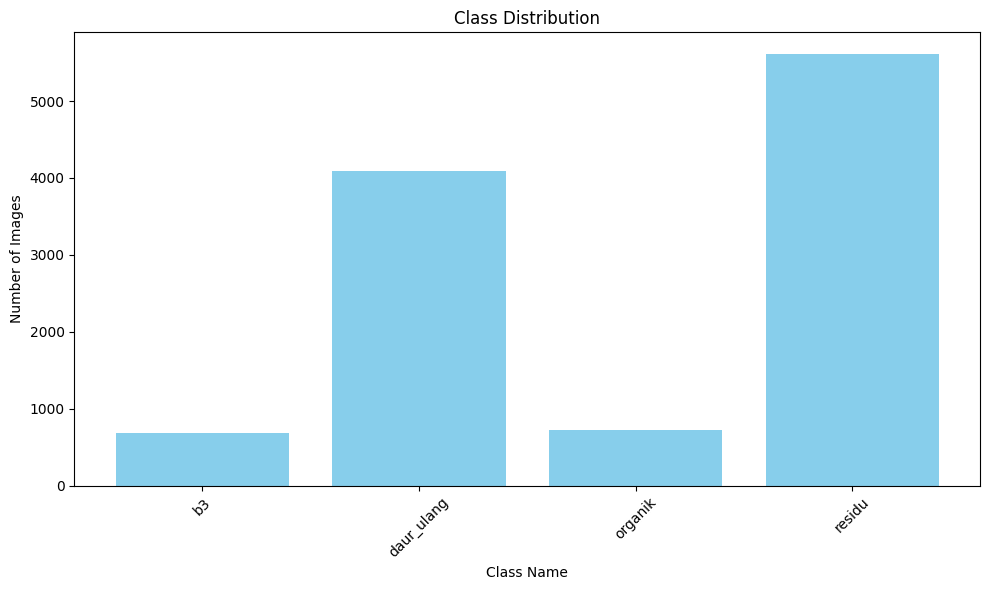

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
!pip install bing-image-downloader

In [46]:
# category_keywords = {
#     'b3': ['baterai bekas', 'limbah B3 rumah tangga', 'benda elektronik rusak'],
#     'organik': ['sampah daun', 'sisa makanan', 'limbah dapur organik'],
#     'daur_ulang': ['botol plastik bekas', 'kaleng logam', 'kertas bekas'],
#     'residu': ['pakaian bekas rusak', 'sepatu rusak', 'sampah rumah tangga campur']
# }

In [47]:
# import os
# from bing_image_downloader import downloader

# target_count = 5000
# source_folder = 'dataset_kategori'
# keywords_map = {
#     'b3': ['baterai bekas', 'limbah B3 rumah tangga', 'benda elektronik rusak'],
#     'organik': ['sampah daun', 'sisa makanan', 'limbah dapur organik'],
#     'daur_ulang': ['botol plastik bekas', 'kaleng logam', 'kertas bekas'],
#     'residu': ['pakaian bekas rusak', 'sepatu rusak', 'sampah rumah tangga campur']
# }

# # Fungsi menghitung jumlah file gambar dalam folder
# def count_images(path):
#     if not os.path.exists(path):
#         return 0
#     return len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])

# # Scraping
# for class_name, keywords in keywords_map.items():
#     class_path = os.path.join(source_folder, class_name)
#     os.makedirs(class_path, exist_ok=True)

#     current_count = count_images(class_path)
#     remaining = target_count - current_count

#     print(f"\nKelas '{class_name}': sudah ada {current_count}, perlu {remaining} gambar.")

#     if remaining <= 0:
#         continue

#     keyword_index = 0
#     while remaining > 0 and keyword_index < len(keywords):
#         keyword = keywords[keyword_index]
#         print(f"Scraping '{keyword}' untuk kelas '{class_name}'...")

#         downloader.download(keyword,
#                             limit=min(remaining, 100),
#                             output_dir='temp_download',
#                             adult_filter_off=True,
#                             force_replace=False,
#                             timeout=60,
#                             verbose=False)

#         download_path = os.path.join('temp_download', keyword)
#         if os.path.exists(download_path):
#             files = os.listdir(download_path)
#             for f in files:
#                 src = os.path.join(download_path, f)
#                 dst = os.path.join(class_path, f"{class_name}_{current_count}.jpg")
#                 os.rename(src, dst)
#                 current_count += 1
#                 remaining -= 1
#             os.rmdir(download_path)

#         keyword_index += 1

# # Hapus folder sementara jika ada
# if os.path.exists('temp_download'):
#     os.rmdir('temp_download')

# print("\n✅ Scraping selesai! Semua kelas kini memiliki 5000 gambar (atau lebih).")


Kelas 'b3': sudah ada 1198, perlu 3802 gambar.
Scraping 'baterai bekas' untuk kelas 'b3'...
[%] Downloading Images to /content/temp_download/baterai bekas
[!] Issue getting: https://s1.bukalapak.com/img/1433397062/w-1000/Baterai_Batre_Bekas_Laptop_6_CELL.jpg
[!] Error:: HTTP Error 404: Not Found
[!] Issue getting: https://umumsekali.com/wp-content/uploads/2019/10/Baterai2BBekas2BJangan2BDibuang2BSembarangan.jpg
[!] Error:: <urlopen error timed out>
[!] Issue getting: https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjkTDWet-WEnsnebgQU5Vr6FDPP9upsVswQkwM3sRqRS_vXNP6motncjrkoFZxO8OhMLMQWMtmldlMHYOMWbMzxq83PJfHlh8sJyvXrfxqBI9HGUt8U3iNlQFlsQS7cfg0YKTcaGPxqiA2yTr8Bc8JmKjeJrIe0jo5HLboxv7kAu1vNl_LXJOMUmF7J0Mdp/s1600/Aki Bekas3.jpg
[!] Error:: URL can't contain control characters. '/img/b/R29vZ2xl/AVvXsEjkTDWet-WEnsnebgQU5Vr6FDPP9upsVswQkwM3sRqRS_vXNP6motncjrkoFZxO8OhMLMQWMtmldlMHYOMWbMzxq83PJfHlh8sJyvXrfxqBI9HGUt8U3iNlQFlsQS7cfg0YKTcaGPxqiA2yTr8Bc8JmKjeJrIe0jo5HLboxv7kAu1vNl_LXJOMUm

In [50]:
import os

dataset_dir = '/content/dataset_split/train'  # ganti jika nama foldermu berbeda

class_counts = {}
total = 0

for class_name in sorted(os.listdir(dataset_dir)):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = count
        total += count

# Tampilkan hasil
print("Jumlah gambar per kelas:")
for class_name, count in class_counts.items():
    print(f"  {class_name}: {count} gambar")

print(f"\nTotal seluruh gambar: {total} gambar")


Jumlah gambar per kelas:
  b3: 685 gambar
  daur_ulang: 4086 gambar
  organik: 724 gambar
  residu: 5612 gambar

Total seluruh gambar: 11107 gambar
